In [413]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

(32, 200, 200, 4)


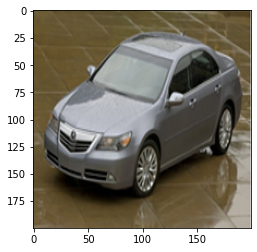

In [414]:
imagePaths = glob.glob('./dataset/images/' + classes[0][0] + '/*.jpg') 

images = []
for imgPath in imagePaths:
        img = Image.open(imgPath)
        img = img.resize((200, 200))
        img.load()
        data = np.asarray(img, dtype="int32")
        images.append(data)

images = np.array(images)

print(images.shape)
plt.imshow(images[0])

In [415]:
classes_data_frame = pd.read_csv('./dataset/names.csv')
classes = np.array(classes_data_frame)


single_class = []

for img in images:
    single_class.append(0)
    
single_class = np.array(single_class)
    
print(single_class[0])
print(single_class.shape)

0
(32,)


In [416]:
x_train, x_test, y_train, y_test = train_test_split(images, single_class)

In [417]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (24, 200, 200, 4)
y_train shape: (24,)
x_test shape: (8, 200, 200, 4)
y_test shape: (8,)
24 train samples
8 test samples


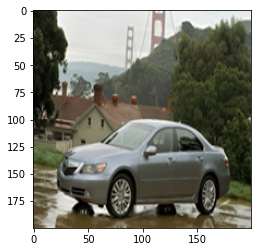

In [418]:
plt.imshow(x_train[15])

In [419]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [420]:
print(y_train)
print(y_test)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0

In [421]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train)
print(x_test)

[[[[1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843 1.        ]
   [1.         1.         1.         1.        ]
   [0.8980392  0.8980392  0.8980392  1.        ]]

  [[1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843 1.        ]
   [1.         1.         1.         1.        ]
   [0.8980392  0.8980392  0.8980392  1.        ]]

  [[1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   [1.         1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843 1.        ]
   [1.         1.         1.         1.        ]
   [0.8980392  0.8980392  0.8980392  1.        ]]

  ...

  [[1.         1.         1.         1.        ]
   [1.         1.         1.       

In [422]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 4)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='softmax'))

In [423]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 200, 200, 32)      1184      
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 50, 50, 128)     

In [424]:
opt = SGD(learning_rate=0.001, momentum=0.9)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss="categorical_crossentropy", optimizer=opt)

model.fit(x_train, y_train, epochs=100, verbose=1 ,callbacks=[monitor], validation_data=(x_test, y_test))

ValueError: A target array with shape (24, 10) was passed for an output of shape (None, 1) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.